<ipython-input-8-9b1f4f404c8f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


Coefficients:
Beta1: 21.578049448350118
Beta2: 165637.02694086614
Beta3: 120659.94881629592
Beta4: 1651.1390540199527
Beta5: 15.20074392374104
Intercept: -2637299.0333282705
Mean Absolute Percentage Error (MAPE): 7.624185208181432
Accuracy of our model: 92.37581479181857


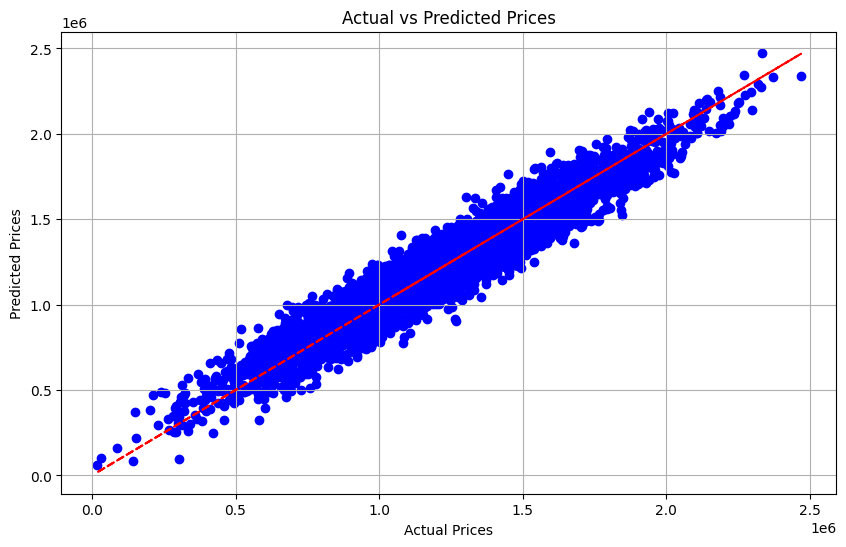

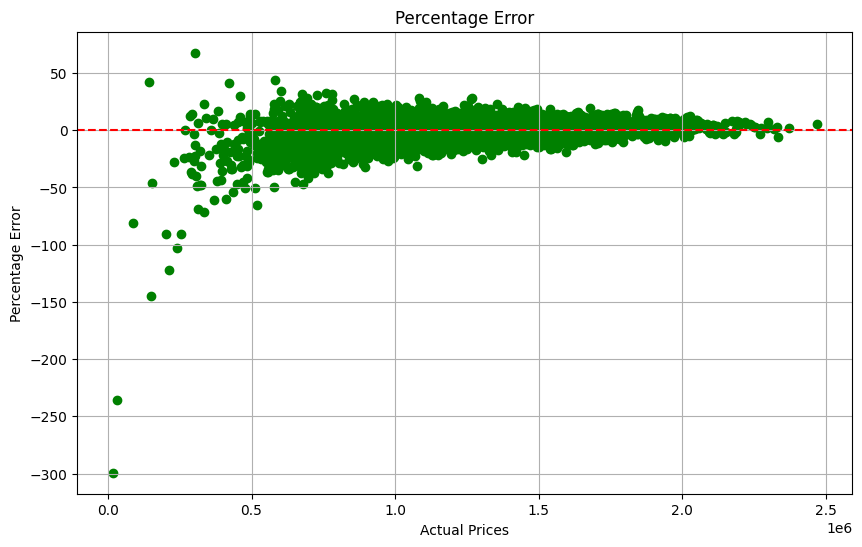

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
HouseDF = pd.read_csv('/content/USA_Housing.csv')

#Statistical informations of features
HouseDF.describe()

#Calculate correaltions

# Define independent and dependent variables
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
             'Avg. Area Number of Bedrooms', 'Area Population']]
y = HouseDF['Price']

# Add a column of ones to X for the intercept term
X['Intercept'] = 1

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Compute coefficients using OLS method
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Display coefficients
print("Coefficients:")
for i, coef in enumerate(coefficients[:-1]):
    print(f"Beta{i+1}: {coef}")
print(f"Intercept: {coefficients[-1]}")

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Make predictions
predictions = X.dot(coefficients)

# Calculate MAPE
mape = mean_absolute_percentage_error(y, predictions)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Accuracy of our model:',(100-mape))
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue')
plt.plot(y, y, color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Calculate percentage error
percentage_error = ((y - predictions) / y) * 100

# Plot the percentage error
plt.figure(figsize=(10, 6))
plt.scatter(y, percentage_error, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Percentage Error')
plt.xlabel('Actual Prices')
plt.ylabel('Percentage Error')
plt.grid(True)
plt.show()


In [9]:
class DecisionTreeNode:
    def __init__(self, feature_index=None, split_value=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of the feature to split on
        self.split_value = split_value  # Value to split the feature on
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Prediction value for leaf node

def mse(targets):
    if len(targets) == 0:
        return 0
    mean = np.mean(targets)
    return np.mean((targets - mean) ** 2)

def find_best_split(X, y):
    best_feature_index = None
    best_split_value = None
    min_mse = float('inf')

    for feature_index in range(X.shape[1]):
        unique_values = np.unique(X[:, feature_index])
        for split_value in unique_values:
            left_indices = X[:, feature_index] < split_value
            right_indices = ~left_indices
            left_mse = mse(y[left_indices])
            right_mse = mse(y[right_indices])
            total_mse = left_mse + right_mse
            if total_mse < min_mse:
                min_mse = total_mse
                best_feature_index = feature_index
                best_split_value = split_value

    return best_feature_index, best_split_value

def build_tree(X, y, depth=0, max_depth=None):
    if max_depth is not None and depth >= max_depth:
        return DecisionTreeNode(value=np.mean(y))

    best_feature_index, best_split_value = find_best_split(X, y)
    if best_feature_index is None:
        return DecisionTreeNode(value=np.mean(y))

    left_indices = X[:, best_feature_index] < best_split_value
    right_indices = ~left_indices

    left_subtree = build_tree(X[left_indices], y[left_indices], depth+1, max_depth)
    right_subtree = build_tree(X[right_indices], y[right_indices], depth+1, max_depth)

    return DecisionTreeNode(feature_index=best_feature_index, split_value=best_split_value,
                             left=left_subtree, right=right_subtree)

def predict(node, sample):
    if node.value is not None:
        return node.value
    if sample[node.feature_index] < node.split_value:
        return predict(node.left, sample)
    else:
        return predict(node.right, sample)

# Define independent and dependent variables
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
             'Avg. Area Number of Bedrooms', 'Area Population']]
y = HouseDF['Price']

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Build decision tree
decision_tree = build_tree(X, y, max_depth=5)

# Make predictions
predictions = [predict(decision_tree, sample) for sample in X]

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y, predictions)
print('Mean Absolute Percentage Error (MAPE):', mape)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Mean Absolute Percentage Error (MAPE): 30.918177273143726
